* Import des librairies

In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


* Import du Datafraùe

In [38]:
df = pd.read_csv('data/spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


* Vérification de la strcture du dataframe

In [39]:
print(f"Le nombre de colonne est de {df.shape[1]}")
print(f"Le nombre de Lignes est de {df.shape[0]}")

Le nombre de colonne est de 5
Le nombre de Lignes est de 5572


* Statisitiques

In [40]:
df.describe(include='all')

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


* Répartition des textes dans une seule colonne qui s'appellera texte
* On renomme la première colonne par type pour que ce soit parlant

In [41]:
df['texte'] = df[['v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']].apply(lambda row: ' '.join(row.astype(str)), axis=1)


In [42]:
df.drop(columns=['v2','Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [43]:
df.rename(columns={'v1': 'type'},inplace=True)

* Répartition des spam ou non 

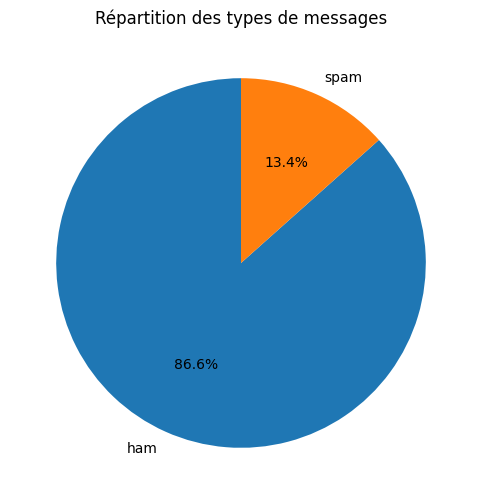

In [44]:
counts = df['type'].value_counts()

# Créer un camembert
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Répartition des types de messages')
plt.show()

Longueur des chaines

In [45]:
df["long"] = df["texte"].astype(str).str.len()

In [46]:
min_long = df['long'].min()
moy_long = df['long'].mean()
med_long = df['long'].median()
max_long = df['long'].max()

print(f"Longueur minimale : {min_long}")
print(f"Longueur moyenne : {moy_long:.2f}")
print(f"Longueur médiane : {med_long}")
print(f"Longueur maximale : {max_long}")

Longueur minimale : 14
Longueur moyenne : 92.64
Longueur médiane : 74.0
Longueur maximale : 922


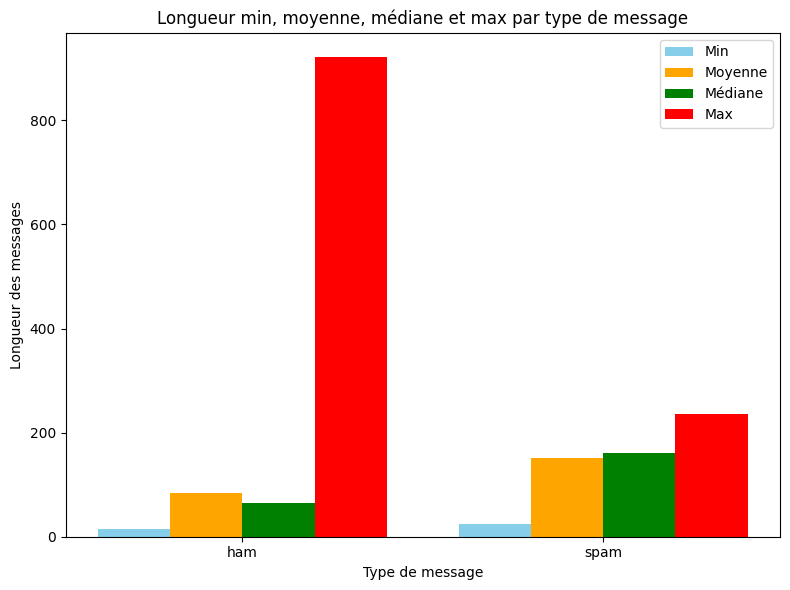

In [47]:
stats = df.groupby('type')['long'].agg(['min', 'mean', 'median', 'max']).reset_index()

# Largeur des barres
bar_width = 0.2
x = range(len(stats))

# Création du graphique
plt.figure(figsize=(8,6))

plt.bar([i - 1.5*bar_width for i in x], stats['min'], width=bar_width, label='Min', color='skyblue')
plt.bar([i - 0.5*bar_width for i in x], stats['mean'], width=bar_width, label='Moyenne', color='orange')
plt.bar([i + 0.5*bar_width for i in x], stats['median'], width=bar_width, label='Médiane', color='green')
plt.bar([i + 1.5*bar_width for i in x], stats['max'], width=bar_width, label='Max', color='red')

# Légendes et axes
plt.xticks(x, stats['type'])
plt.xlabel('Type de message')
plt.ylabel('Longueur des messages')
plt.title('Longueur min, moyenne, médiane et max par type de message')
plt.legend()
plt.tight_layout()
plt.show()

On peut voir que la moyenne et la médiane sont plus important en spam mais attention, le plus long est du côté sms non spam

On redéfinit la colonne type en target avec comme valeur 0 ou 1

In [48]:
df

,type,texte,long
0,ham,"Go until jurong point, crazy.. Available only ...",123
1,ham,Ok lar... Joking wif u oni... nan nan nan,41
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,167
3,ham,U dun say so early hor... U c already then say...,61
4,ham,"Nah I don't think he goes to usf, he lives aro...",73
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,173
5568,ham,Will Ì_ b going to esplanade fr home? nan nan nan,49
5569,ham,"Pity, * was in mood for that. So...any other s...",69
5570,ham,The guy did some bitching but I acted like i'd...,137


In [49]:
df['target']=df["type"].map({"ham": 0, "spam": 1})
df.drop(columns=['type','long'],axis=1,inplace=True)

In [51]:
df.to_csv('data/spam_v2.csv',index=False)